In [21]:
import csv
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.optim as optim
import numpy as np

from tqdm.auto import tqdm
from pathlib import Path
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = "cpu"

BATCH_SIZE = 10
CROP_SIZE = 224
IMAGE_SHAPE = (400, 400)
PROCESSED_DATASET_PATH_MNETV1_TEST = Path("../../../../dataset/processed/awa2/mnetv1/test/")


PRETRAINED_MODEL = "./logs/models/model_e22.pth"

print(device)

cuda:0


In [22]:
test_transform = transforms.Compose([
    transforms.Resize(IMAGE_SHAPE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

test_set = datasets.ImageFolder(PROCESSED_DATASET_PATH_MNETV1_TEST, transform=test_transform)
test_loader = DataLoader(test_set, shuffle=True)

In [23]:
model = torchvision.models.mobilenet_v2(num_classes=len(test_set.classes), pretrained=False)
model = model.to(device)
model.load_state_dict(torch.load(PRETRAINED_MODEL))
model.eval()

c:\Users\Deep Raval\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Deep Raval\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

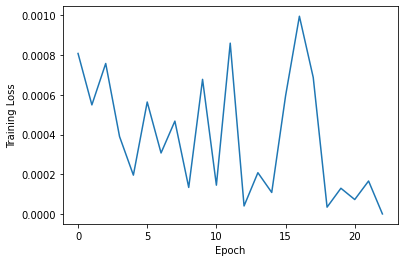

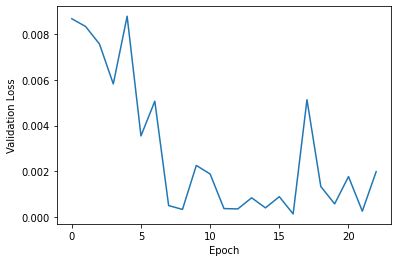

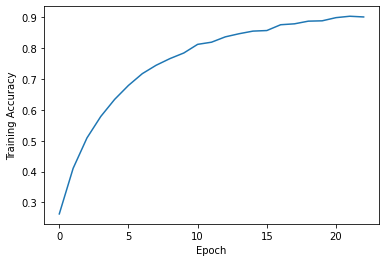

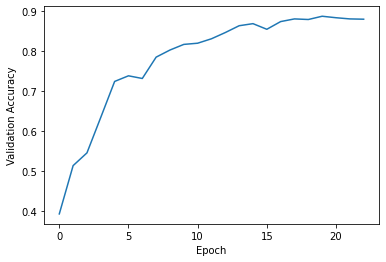

In [24]:
# Loss and acc graph
import pandas as pd

df = pd.read_csv("./logs/training_logs.csv")

plt.figure("Epoch vs Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.plot(df["epoch"], df["train_loss"])
plt.show()

plt.figure("Epoch vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.plot(df["epoch"], df["val_loss"])
plt.show()

plt.figure("Epoch vs Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.plot(df["epoch"], df["train_acc"])
plt.show()

plt.figure("Epoch vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.plot(df["epoch"], df["val_acc"])
plt.show()

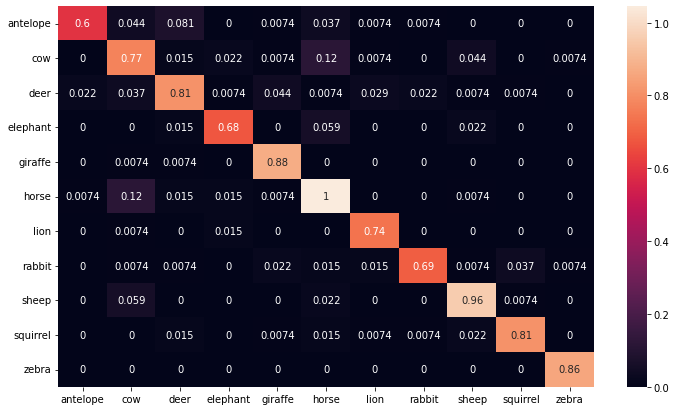

In [25]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []


# iterate over test data
for images, labels in test_loader:
        output = np.squeeze(model(images.cuda()).data.max(1, keepdim=True)[1].cpu().numpy())
        y_pred.extend([output]) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend([labels]) # Save Truth

# constant for classes
classes = test_set.classes

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('./confusion_mnetv1.png')

In [26]:
y_pred = []
y_true = []

test_loader3 = DataLoader(test_set, shuffle=True)
for images, labels in test_loader3:
        output = np.squeeze(model(images.cuda()).data.max(1, keepdim=True)[1].cpu().numpy())
        y_pred.extend([output])
        
        labels = labels.data.cpu().numpy()
        y_true.extend([labels])

from sklearn.metrics import accuracy_score, classification_report


print("Overall Accuracy: ", round(accuracy_score(y_true, y_pred)*100,2)," %")
print(classification_report(y_true, y_pred,target_names=test_set.classes))

Overall Accuracy:  88.3  %
              precision    recall  f1-score   support

    antelope       0.95      0.76      0.85       106
         cow       0.73      0.78      0.76       135
        deer       0.84      0.81      0.83       135
    elephant       0.92      0.88      0.90       105
     giraffe       0.90      0.98      0.94       121
       horse       0.79      0.86      0.83       165
        lion       0.92      0.97      0.94       103
      rabbit       0.95      0.85      0.90       110
       sheep       0.90      0.92      0.91       142
    squirrel       0.94      0.92      0.93       120
       zebra       0.98      1.00      0.99       117

    accuracy                           0.88      1359
   macro avg       0.89      0.88      0.89      1359
weighted avg       0.89      0.88      0.88      1359



zebra zebra_10246.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


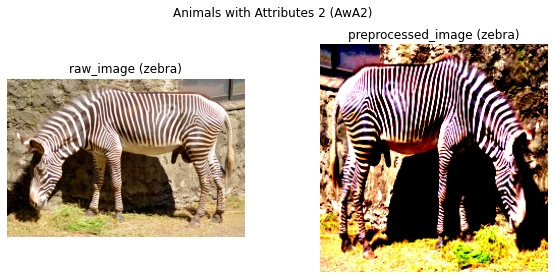

cow cow_10848.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


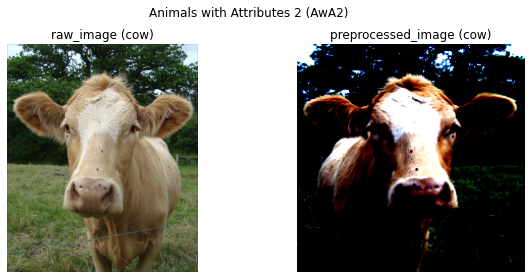

horse horse_10774.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


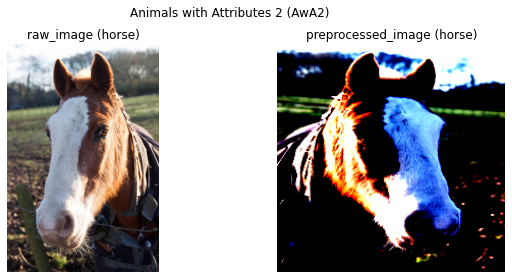

elephant elephant_10960.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


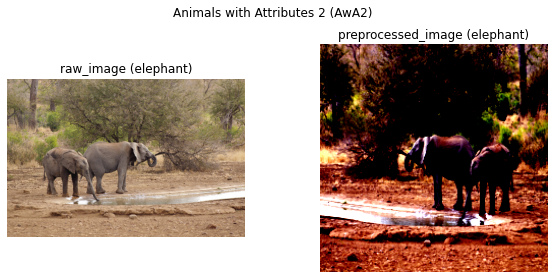

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


squirrel squirrel_10038.jpg


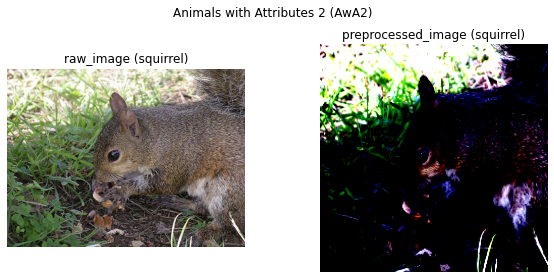

antelope antelope_10056.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


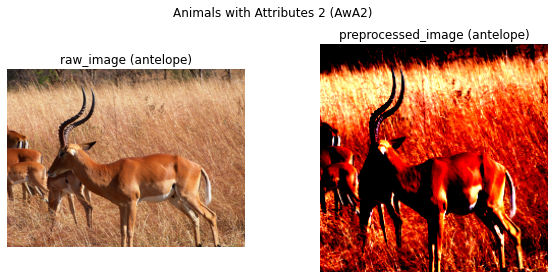

deer deer_10569.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


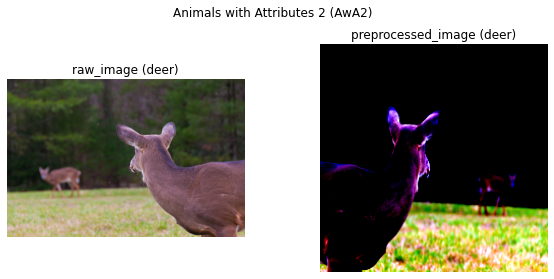

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


rabbit rabbit_10158.jpg


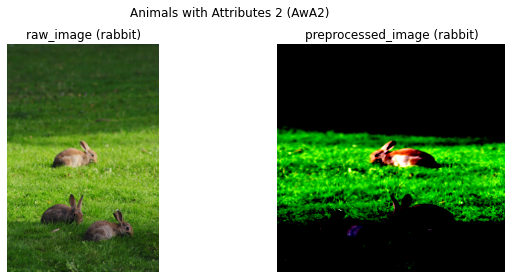

antelope antelope_10746.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


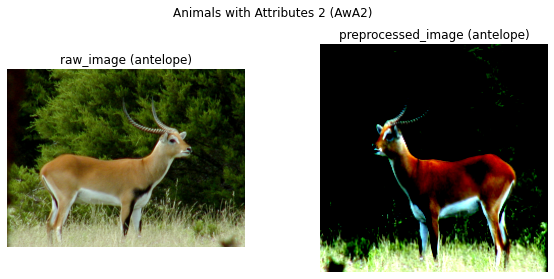

antelope antelope_10816.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


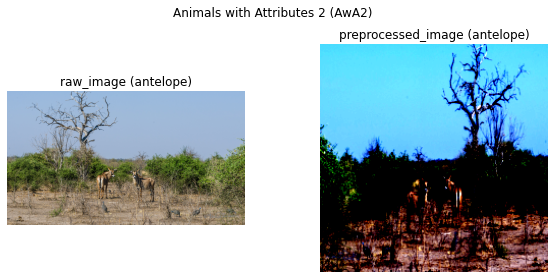

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from PIL import Image
import matplotlib.gridspec as gridspec


import random
import os

# change here -> add transformation
compose = [
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5179441571235657, 0.5002516508102417, 0.41238734126091003], std=[0.2625972032546997, 0.2575567364692688, 0.27541598677635193])
]

for i in range(10):
    # change here -> image path
    class_name = random.choice(os.listdir("../../../../dataset/processed/awa2/mnetv1/train/"))
    img = random.choice(os.listdir("../../../../dataset/processed/awa2/mnetv1/train/" + class_name))
    print(class_name, img)
    image = Image.open("../../../../dataset/processed/awa2/mnetv1/train/" + class_name + "/" + img)
    image_format = 'png'
    preprocess = transforms.Compose(compose)
    image2 = np.transpose(preprocess(image) , (1,2,0))
    
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    # Remove any extra padding and borders
    fig.tight_layout(pad=0)
    for ax in axs:
        ax.axis('off')

    # Display the images on each subplot
    axs[0].imshow(image)
    axs[1].imshow(image2)

    # Add individual titles to each subplot
    axs[0].set_title(f'raw_image ({class_name})')
    axs[1].set_title(f'preprocessed_image ({class_name})')

    # Add a shared suptitle to the top of the figure
    fig.suptitle('Animals with Attributes 2 (AwA2)')
    fig.subplots_adjust(top=0.85, wspace=0.3)


    # Show the plot
    plt.show()